# HW 4

## 1

1. I decided to download Visual Studio Code, I downloaded it from th website and opened it through applications. 

2. Files can be saved from the editor through the File -> Save As -> [Enter Location] or by using shortcut Control + S. Also Vscode automatically saves changes. 

3. We can use the find command in Terminal to locate a file. Example would be: find / -name hw-4.ipynb



## 2

### rustc--version: rustc 1.76.0 (07dca489a 2024-02-04)

### cargo--version: cargo 1.76.0 (c84b36747 2024-01-18)


## 3

In this problem, you are asked to use decision trees for regression with two different target loss functions: mean square error (MSE) and mean absolute error (MAE). Design a function f : [0, 1] → [0, 1] (a function where the input is between 0 and 1 and the output is also between 0 and 1) such that when you sample input points X𝑖 from [0,
1] and use the sequence (X𝑖 , f(X𝑖)) as your input, you are likely to see the difference between the two loss functions with six leafs (i.e., with max_leaf_nodes=6).Among other things, your solution should contain:

- a. a plot of f and the two functions resulting from the training process under different loss functions,
- b. an explanation of the differences and how they are a result of differences between the two loss functions.

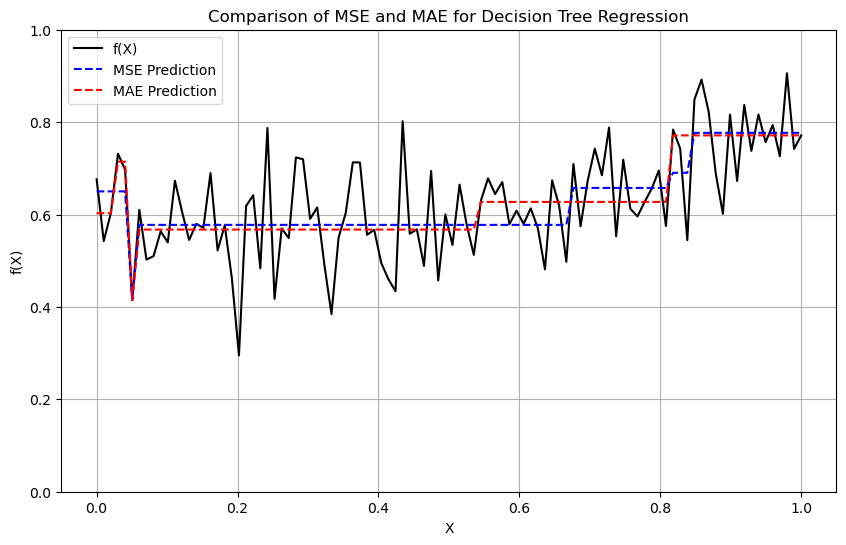

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Generate random data points and plot x and y functions between [0,1]
np.random.seed(0)
a, b = 0, 1
n = 100
x = np.linspace(a, b, n)
noise = np.random.normal(0, 0.1, n)
y = 1 / (1 + np.exp(-x))+ noise

# Fit decision trees with different loss functions
#spilts using mse
reg_mse = DecisionTreeRegressor(max_leaf_nodes=6, criterion='squared_error') 
#spilts using mae
reg_mae = DecisionTreeRegressor(max_leaf_nodes=6, criterion='absolute_error')
reg_mse.fit(x.reshape(-1, 1), y) #converts into 2-D array
reg_mae.fit(x.reshape(-1, 1), y)

# Plot the original function 
#And the two functions resulting from the training process under different loss functions
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(X)', color='black')
plt.plot(x, reg_mse.predict(x.reshape(-1, 1)), label='MSE Prediction', linestyle='--', color='blue')
plt.plot(x, reg_mae.predict(x.reshape(-1, 1)), label='MAE Prediction', linestyle='--', color='red')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('Comparison of MSE and MAE for Decision Tree Regression')
plt.legend()
plt.grid(True)
plt.ylim(0, 1) 
plt.show()


### The decision tree regressor with max_leaf_nodes=6 predominantly generates horizontal predictions for both MSE and MAE due to its limited complexity. This limitation causes the model to produce piecewise constant predictions. MSE minimizes squared differences, making predictions approximating the mean output, while MAE minimizes absolute differences, leading to median-like predictions. Despite differences in loss functions, the constrained model struggles to capture the underlying function's variations, resulting in similar horizontal lines for both MSE and MAE predictions.

## 4

Recall that numpy.polyfit can be used to find a bounded degree polynomial that fits data well. Experiment with different degree parameters for polyfit. Show clear
examples of overfitting and underfitting occurring when learning a function f from [0, 1] to R (the output is not bounded - all real numbers). Creating function f is part of your
assignment. Support your examples with error estimates. Your examples must feature noisy data points

/Users/aa/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: RankWarning:

Polyfit may be poorly conditioned



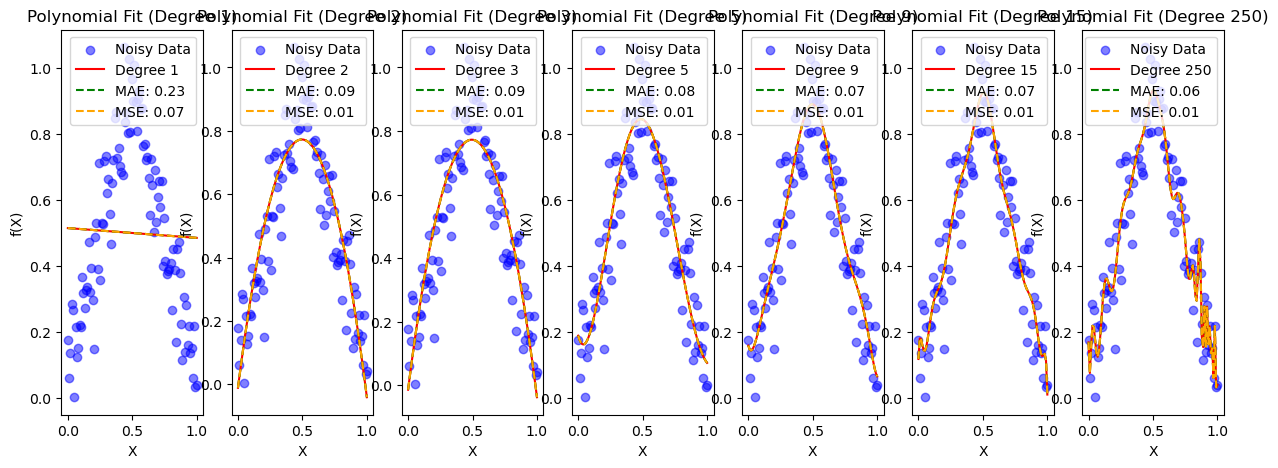

In [154]:
import numpy as np
import matplotlib.pyplot as plt

# Define the f(x) that is the in the range [0,1]
def f(x):
    if x < 0.5:
        return 2 * x + np.random.normal(0, 0.1) #adding noise
    else:
        return -2 * x + 2 + np.random.normal(0, 0.1)

# Generate noisy data points using f(x) in the range [0,1] for 100 random points
np.random.seed(0)
x = np.linspace(0, 1, 100)
y = np.array([f(x_i) for x_i in x])

# Experimenting with different degrees to fit the data
degrees = [1,2,3,5,9,15,250]
plt.figure(figsize=(15, 5))

#for loop to evaluate polynomials at each degree 
for i, degree in enumerate(degrees): #iterate over tuple
    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(x, y, label='Noisy Data', color='blue', alpha=0.5)
    
    # Fit polynomial in different degrees 
    coeffs = np.polyfit(x, y, degree)
    
    # Evaluate polynomial using numpy function polyval that directly evaluates polynomials 
    y_pred = np.polyval(coeffs, x)
    
    # Computing error functions (mean squared error and mean absolute error)
    mse = np.mean((y - y_pred)**2)
    mae = np.mean(np.abs(y - y_pred))
    
    # Plot polynomial fit
    plt.plot(x, y_pred, label=f'Degree {degree}', color='red')
    plt.plot(x, y_pred, linestyle='--', label=f'MAE: {mae:.2f}', color='green')
    plt.plot(x, y_pred, linestyle='--', label=f'MSE: {mse:.2f}', color='orange')
    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.legend()
    plt.show



### There is most underfitting in degree = 1 as the function is a horizontal line and does not capture the data at all. As the number of degrees increase, the polynomial fits better. It improves with each degree and the error value also reduces. But as degrees increase, the function becomes too optimised for data points and would fail to fit on new data. This would lead to building a function that only fits training data and cannot be generalised 